#### K Means Clusturing Algorithim
- Unsupervised machine learning.
- we dont have a target variable.
- we try to identify pattern in data.
- K means helps in defining clusturs in data to make valuble pridictions.

**Process**
- start with K centroids by putting them at random place.
- Compute distance of every point from the centroid and clustur tem accordingly.
- adjust the centroids so they become center of gravity for given clusture.
- again re-clusture every point based on their distance with centroid.
- again adjust centroidss.
- Recompute clustures and repeat this till data points stop changing the clusturs.

**How to determine correct numbers of clusturs(k)**
- Algo Method
    - we start with some k (like k = 2)
    - we try to compute SSE = Sum of Squared Errors
    - SSE = find distance of each point from the respective k(centroid) square each distance and sum all squared distances. Do this for every clusture.
    - now you have SSE = SSE1 + SSE2...+ SSEk
    - drow plot of SSE vc k
    - you will see SSE at some k is 0
    - find the elbow point of the graph.
    - select the k at the elbow point.

In [25]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [26]:
income_df = pd.read_excel("ML_Algo_Datasets\income.xlsx")
income_df.head()


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


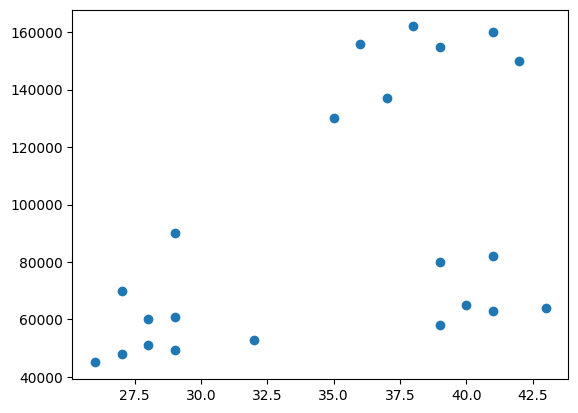

In [27]:
plt.scatter(income_df["Age"], income_df["Income($)"])

In [28]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [29]:
y_predicted = km.fit_predict(income_df[["Age", "Income($)"]])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

C:\Users\utkarsh.alpuria\AppData\Local\Temp\ipykernel_25012\3032518901.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


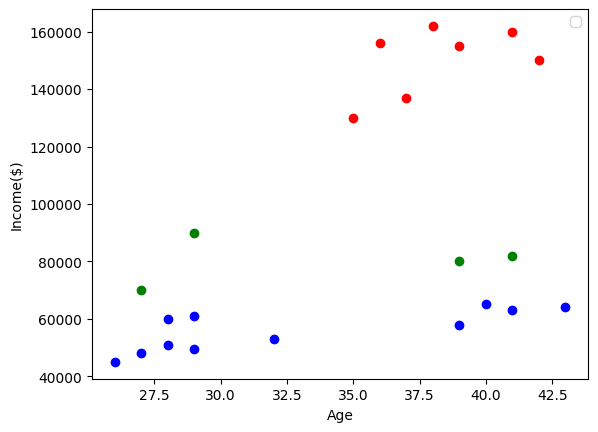

In [30]:
income_df["cluster"] = y_predicted

cluster0 = income_df[income_df.cluster == 0]
cluster1 = income_df[income_df.cluster == 1]
cluster2 = income_df[income_df.cluster == 2]
plt.scatter(cluster0.Age, cluster0["Income($)"], color="green")
plt.scatter(cluster1.Age, cluster1["Income($)"], color="red")
plt.scatter(cluster2.Age, cluster2["Income($)"], color="blue")
# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="purple", marker="*", label="centroid")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [31]:
# green cluster is fine but there are some issue in red and blue
# this is becoz the scaling in x and y axis is not proper the income range is very high and age range is ver less
# thus we do some preprocessing and use MinMaxScalar

scalar = MinMaxScaler()
scalar.fit(income_df[["Income($)"]])
income_df["Income($)"] = scalar.transform(income_df[["Income($)"]]) # scales the income range from 0 to 1
scalar.fit(income_df[["Age"]])
income_df["Age"] = scalar.transform(income_df[["Age"]]) # scales the age range from 0 to 1
income_df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [32]:
y_predicted = km.fit_predict(income_df[["Age", "Income($)"]])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [34]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

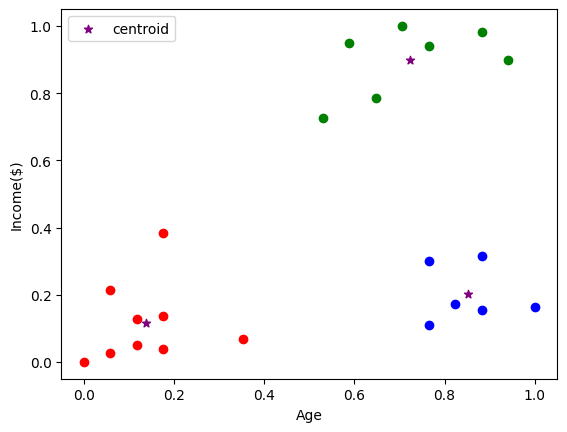

In [35]:
income_df["cluster"] = y_predicted

clusture0 = income_df[income_df.cluster == 0]
clusture1 = income_df[income_df.cluster == 1]
clusture2 = income_df[income_df.cluster == 2]
plt.scatter(clusture0.Age, clusture0["Income($)"], color="green")
plt.scatter(clusture1.Age, clusture1["Income($)"], color="red")
plt.scatter(clusture2.Age, clusture2["Income($)"], color="blue")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="purple", marker="*", label="centroid")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [39]:
# Algo Method
# we don't know k 
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(income_df[["Age","Income($)"]])
    sse.append(km.inertia_) # gives sse for every k
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.368773407644059,
 0.28184797443662385,
 0.24591705034877784,
 0.16869711728567788,
 0.1327661931978319,
 0.11123550695239098]

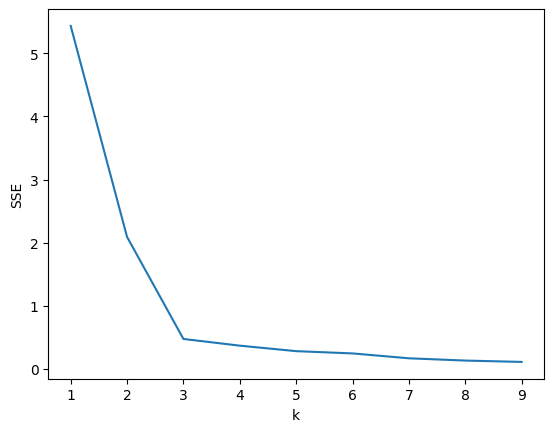

In [40]:
# plot sse vs k
plt.xlabel("k")
plt.ylabel("SSE")
plt.plot(k_rng, sse)

you can see that elbow is 3